# <h1 align="center"><font color="red">Real Datasets</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Um exemplo de `ClassificationThesholdTuner` com classificadores reais em conjuntos de dados reais. Os classificadores não são ajustados aqui, e podemos encontrar diferentes limiares ideais com modelos bem ajustados.

# <font color="blue">Breast Cancer</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..') # Então, ao usar sys.path.append('..'), você está dizendo ao Python para adicionar o diretório pai 
# do diretório atual ao caminho de busca de módulos (o sys.path), permitindo que você importe módulos que estão localizados no nível superior ao do arquivo que está rodando.
from threshold_tuner import ClassificationThresholdTuner

In [2]:
# Este é um conjunto de dados de classificação binária. 
from sklearn.datasets import load_breast_cancer

np.random.seed(0)

data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 30)

In [4]:
target_classes = pd.Series(y_true).unique()
target_classes

array([0, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.30, random_state=42)

In [6]:
clf = RandomForestClassifier(max_depth=1, random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

In [7]:
y_pred_proba[:4]

array([[0.15551965, 0.84448035],
       [0.91703005, 0.08296995],
       [0.88967277, 0.11032723],
       [0.13469026, 0.86530974]])

In [8]:
tuner = ClassificationThresholdTuner()
tuner

,Metric,0,1,Macro
0,Precision,1.000000,0.931034,0.965517
0,Recall,0.873016,1.000000,0.936508
0,F1,0.932203,0.964286,0.948245


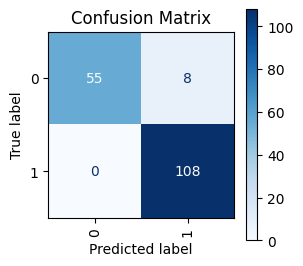

,Metric,Score
0,Brier Score,0.047883
1,AUROC,0.993313


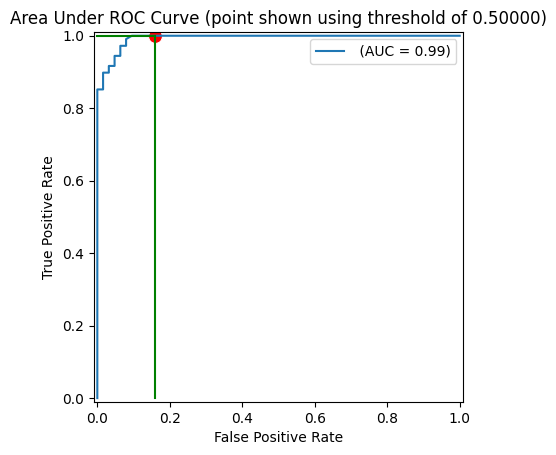

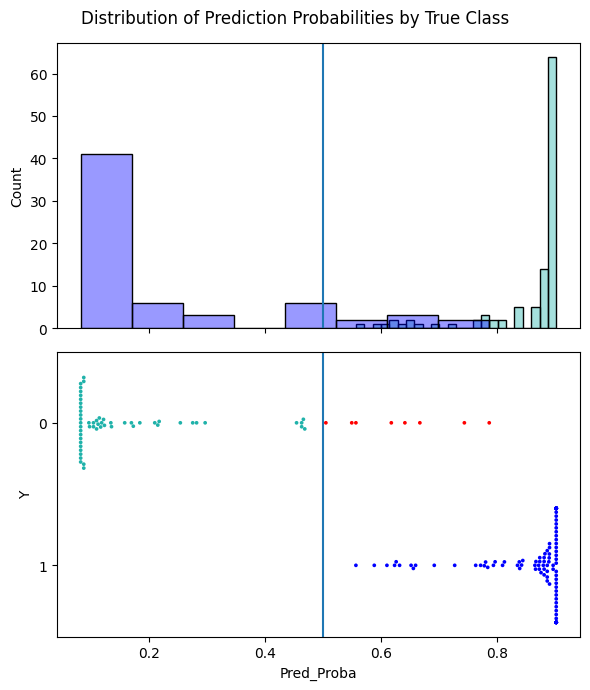

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Primeiro, analisamos as métricas usando o limite padrão de 0,5.
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

100%|██████████| 9/9 [00:04<00:00,  1.91it/s]


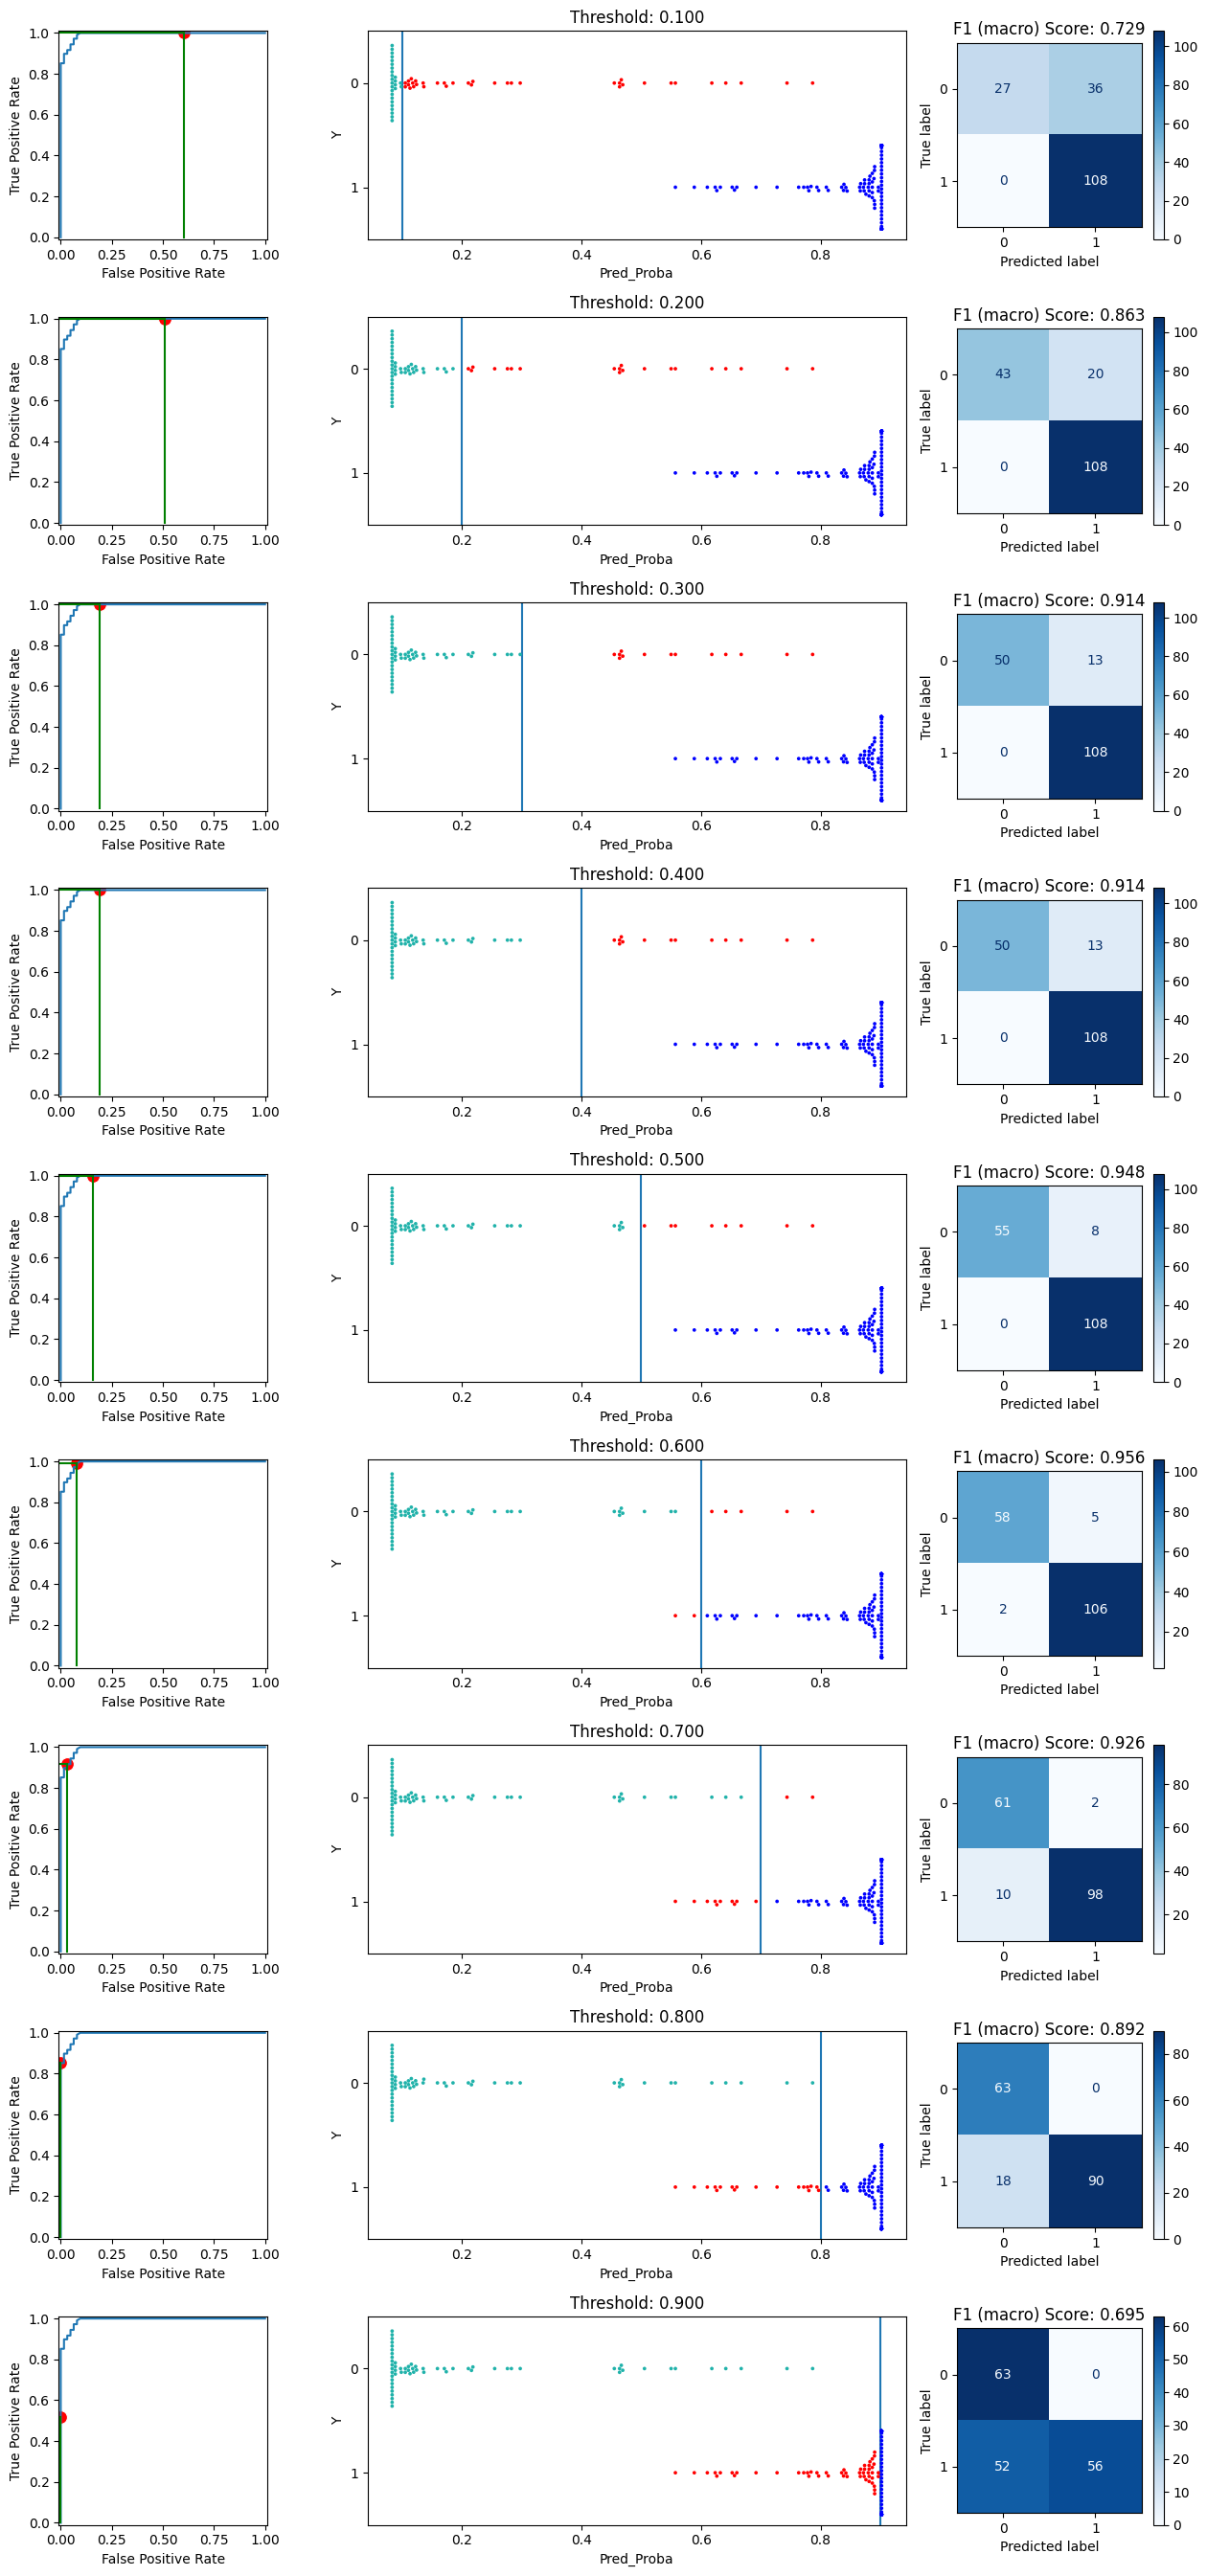

In [10]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)


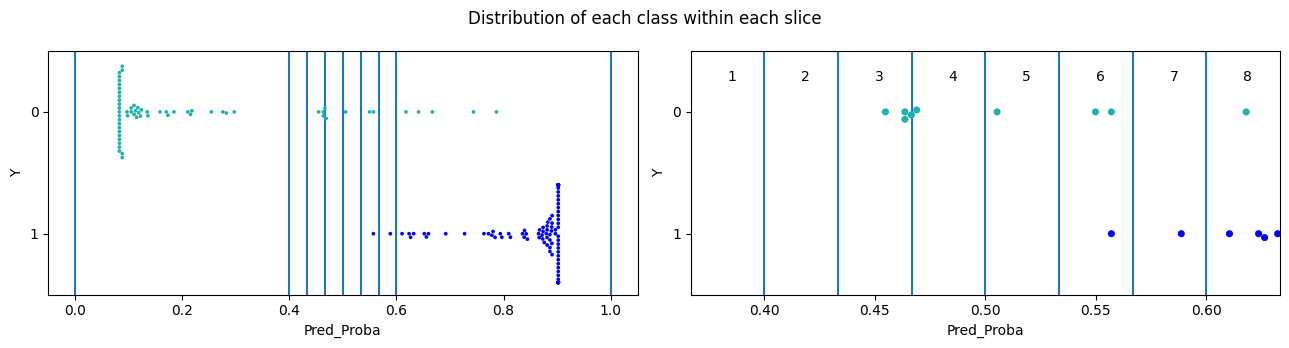

,Slice,Min Prob,Max Prob,1,0,Total,Fraction 1,Fraction 0
0,1,0.000000,0.400000,0,50,50,0.000000,1.000000
1,2,0.400000,0.433333,0,0,0,NaN,NaN
2,3,0.433333,0.466667,0,4,4,0.000000,1.000000
3,4,0.466667,0.500000,0,1,1,0.000000,1.000000
4,5,0.500000,0.533333,0,1,1,0.000000,1.000000
5,6,0.533333,0.566667,1,2,3,0.333333,0.666667
6,7,0.566667,0.600000,1,0,1,1.000000,0.000000
7,8,0.600000,1.000000,106,5,111,0.954955,0.045045


In [11]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.4, end=0.6, num_slices=6)

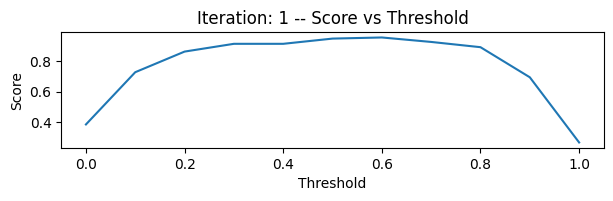

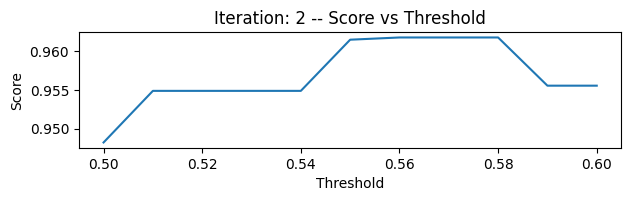

0.5700000000000001

In [12]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)


best_threshold

In [13]:
tuned_pred = tuner.get_predictions(target_classes, y_pred_proba, None, best_threshold)

# Exibir as primeiras 10 previsões:
tuned_pred[:10]

['1', '0', '0', '1', '1', '0', '0', '0', '0', '1']

,Metric,0,1,Macro
0,Precision,0.983051,0.955357,0.969204
0,Recall,0.920635,0.990741,0.955688
0,F1,0.950820,0.972727,0.961773


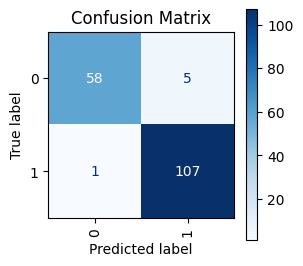

,Metric,Score
0,Brier Score,0.047883
1,AUROC,0.993313


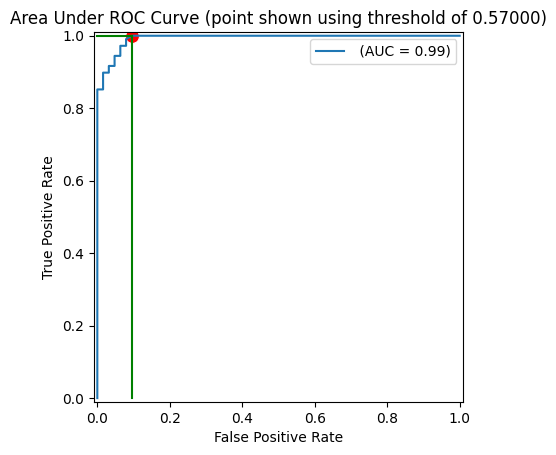

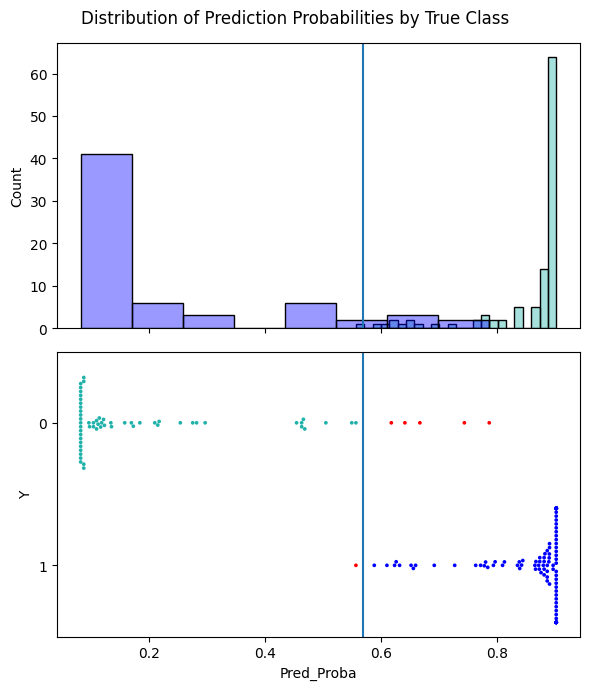

In [14]:
# A F1 macro score usando o best_threshold melhorou de 0,928 para 0,953:

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)  

# <font color="gree">Steel Plates Fault (Falha em placas de aço)</font>

In [ ]:
from sklearn.datasets import fetch_openml

np.random.seed(0)

data = fetch_openml("steel-plates-fault", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df.head()